Aby wybrać swoje działanie, wylicz numer na podstawie swojego numer indeksu i poniższego
programu:

In [ ]:
numer_indeksu = 23439

def index(num):
  # Inicjalizuje zmienną sum na 0
  sum = 0
  while num > 0:
    sum += num % 10
    num = int(num/10)
    
  if sum < 10:
    return sum
  return index(sum)

print(index(numer_indeksu))

3


Przykład:

In [178]:
import numpy as np

neurons_in = 2
neurons_hidden = 2
neurons_out = 1

learning_rate = 0.00001
precision = 0.001
iters = 1000

X = np.array([[2,5], [3,6], [4,7], [3,17], [100,200]])
Y_true = np.array([7, 9, 11, 20, 300])

W1 = np.random.random([neurons_in, neurons_hidden])
W2 = np.random.random([neurons_hidden, neurons_out])

def loss(y_pred, y_true):
  return y_pred-y_true

# Pętla uczenia
for j in range(X.shape[0]):
  # Pobranie przykładu uczącego
  x = X[j,:]
  y_true = Y_true[j]

  H = np.dot((x), W1)
  # Wyliczenie przewidywanej wartości
  y_pred = np.dot(H,W2)

  # Obliczenie błędu dla przykładu uczącego
  er = loss(y_pred, y_true)
  
  i = 0
  while abs(er) > precision and i < iters: 
    # Aktualizacja wag
    W2 = W2 - (learning_rate * er * H.reshape(-1,1))
    W1 = W1 - (learning_rate * er * x.reshape(-1,1) * W2.T)

    H = np.dot((x), W1)
    # Wyliczenie przewidywanej wartości
    y_pred = np.dot(H,W2)
    
    # Obliczenie błędu
    er = loss(y_pred,y_true)
    
    # Zwiększenie licznika iteracji
    i += 1
  print(y_pred)


def prediction(X, W1, W2):
  H = np.dot(X, W1)
  y_pred = np.dot(H, W2)
  return y_pred

print(prediction([300,200], W1, W2))

[4.25617741]
[7.86700567]
[10.78114909]
[20.00099313]
[299.99925999]
[407.84434401]


Zad 3

In [181]:
import numpy as np

# Parametry sieci neuronowej
neurons_in = 2
neurons_hidden = 2
neurons_out = 1
learning_rate = 0.0001
iters = 500
precision = 0.001

# Dane wejściowe
X = np.array([[1, 1], [2, 2], 
              [3, 3], [4, 4], 
              [5, 5], [6, 6], 
              [7,7], [8, 8], 
              [9, 9], [10, 10], 
              [11, 11], [12, 12], 
              [13, 13], [14, 14], 
              [15, 15], [16, 16], 
              [17, 17], [18, 18], 
              [19, 19], [20, 20], [21, 21]])
Y_true = []
for x, y in X:
  Y_true.append(np.cos(x) + np.sqrt(y)) 

# Losowe wagi początkowe
W1 = np.random.random([neurons_in, neurons_hidden])
W2 = np.random.random([neurons_hidden, neurons_out])


def loss(y_pred, y_true):
  return y_pred-y_true

#NEW:
y_test = [];

# Pętla uczenia
for j in range(X.shape[0]):
  # Pobranie przypadku
  x = X[j,:]
  y_true = Y_true[j]
 
  H = np.dot((x), W1)
  # Obliczenie y_pred 
  y_pred = np.dot(H,W2)

  # Obliczenie błędu 
  er = loss(y_pred, y_true)
  
  i = 0
  while abs(er) > precision and i < iters: 
    #Aktualizacja wag
    W2 = W2 - (learning_rate * er * H.reshape(-1,1))
    W1 = W1 - (learning_rate * er * x.reshape(-1,1) * W2.T)

    H = np.dot((x), W1)
    # Obliczenie y_pred
    y_pred = np.dot(H,W2)

    er = loss(y_pred,y_true)
    
    # Zwiększenie licznika iteracji
    i += 1
  y_test.append(y_pred)

#Wyświetlenie porównania
for i in range(len(y_test)):
  print("Y_true: ", Y_true[i], " Y_predict: ", y_test[i], " Error:",  loss(Y_true[i],y_test[i]))


def prediction(X, W1, W2):
  H = np.dot(X, W1)
  y_pred = np.dot(H, W2)
  y_true = np.cos(X[0]) + np.sqrt(X[1])
  er = loss(y_pred,y_true)
  return [y_true, y_pred[0], er[0]]

print(prediction([30,30], W1, W2))

Y_true:  1.5403023058681398  Y_predict:  [0.62332024]  Error: [0.91698207]
Y_true:  0.9980667258259528  Y_predict:  [1.1092791]  Error: [-0.11121238]
Y_true:  0.7420583109684318  Y_predict:  [0.90594154]  Error: [-0.16388323]
Y_true:  1.3463563791363882  Y_predict:  [1.33967055]  Error: [0.00668583]
Y_true:  2.519730162963016  Y_predict:  [2.51340738]  Error: [0.00632278]
Y_true:  3.4096600294335437  Y_predict:  [3.40867069]  Error: [0.00098934]
Y_true:  3.3996535654078954  Y_predict:  [3.40064224]  Error: [-0.00098868]
Y_true:  2.682927090937577  Y_predict:  [2.68390534]  Error: [-0.00097825]
Y_true:  2.088869738115323  Y_predict:  [2.08986525]  Error: [-0.00099552]
Y_true:  2.323206131091927  Y_predict:  [2.32223205]  Error: [0.00097408]
Y_true:  3.3210504883434506  Y_predict:  [3.32005738]  Error: [0.00099311]
Y_true:  4.307955573870246  Y_predict:  [4.30699817]  Error: [0.0009574]
Y_true:  4.512998056914185  Y_predict:  [4.51399186]  Error: [-0.00099381]
Y_true:  3.878394604981775 

In [ ]:
import numpy as np

neurons_in = 2
neurons_hidden = 2
neurons_out = 1
learning_rate = 0.001
iters = 5

X = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7,7], [8, 8], [9, 9], [10, 10], [11, 11], [12, 12], [13, 13], [14, 14], [15, 15], [16, 16], [17, 17], [18, 18], [19, 19], [20, 20]])
y_true = []
for x, y in X:
  y_true.append(np.cos(x) + np.sqrt(y)) 

print(y_true)

W1 = np.random.random([neurons_in, neurons_hidden])
W2 = np.random.random([neurons_hidden, neurons_out])

def loss(y_pred, y_true):
  return y_pred-y_true

def prediction(X, W1, W2):
  H = np.dot(X, W1)
  y_pred = np.dot(H, W2)
  return y_pred

for i in range(iters):
  for x, y in zip(X, y_true):
    y_pred = prediction(x, W1, W2)
    error = loss(y_pred, y)
    W2 = W2 - (learning_rate * error * H.reshape(-1,1))
    W1 = W1 - (learning_rate * error * x.reshape(-1,1) - W2.T)
    print(y_pred)


[1.0, 1.5403023058681398, 0.9980667258259528, 0.7420583109684318, 1.3463563791363882, 2.519730162963016, 3.4096600294335437, 3.3996535654078954, 2.682927090937577, 2.088869738115323, 2.323206131091927, 3.3210504883434506, 4.307955573870246, 4.512998056914185, 3.878394604981775, 3.1132954333485956, 3.0423405196766153, 3.8479422875660636, 4.902957395363365, 5.347603561727343, 4.880218016812972]
[0.]
[2.79268001]
[9.43934]
[18.06089866]
[25.79512284]
[33.40387948]
[49.33783507]
[101.64532117]
[352.53992737]
[2808.86982959]
[109256.10543369]
[1.29469839e+08]
[1.92300429e+14]
[4.78824135e+26]
[3.33214856e+51]
[1.79904777e+101]
[5.81174927e+200]
[inf]
[inf]
[inf]
[inf]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan

Napisz funkcje obliczające wartości ReLU, Sigmoid i Tanh. Wyświetl dla nich wykresy (zamiast plt.scatter() należy wykorzystać metodę plt.plot()).

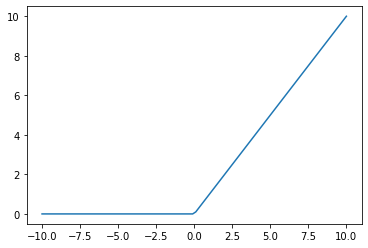

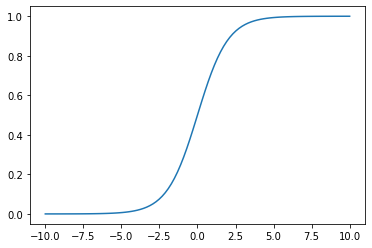

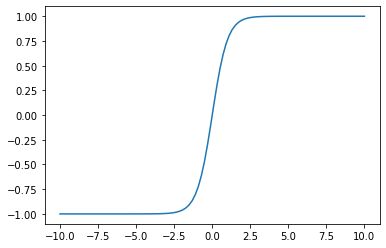

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definicja funkcji ReLU - zwraca wartość maksymalną z 0 i x
def ReLU(x):
    return max(0, x)

# Definicja funkcji Sigmoid - zwraca wartość wyliczoną na podstawie wzoru 1 / (1 + e^-x)
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Definicja funkcji Tanh - zwraca wartość wyliczoną na podstawie wzoru (e^x - e^-x) / (e^x + e^-x)
def Tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

# Tworzymy wektor x zawierający 100 liczb rzeczywistych rozłożonych równomiernie między -10 a 10
x = np.linspace(-10, 10, 100)

# Wykres ReLU
plt.plot(x, [ReLU(i) for i in x])
plt.show()

# Wykres Sigmoid
plt.plot(x, [Sigmoid(i) for i in x])
plt.show()

# Wykres Tanh
plt.plot(x, [Tanh(i) for i in x])
plt.show()

Napisz funkcję obliczającą prawdopodobieństwo przynależności do klastra na podstawie wartości – Softmax.

In [ ]:
import numpy as np

def softmax(x):
    # Wektor prawdopodobieństw przynależności do klastra dla każdej z wartości w wektorze x
    return np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)))

# Przykładowe dane
X = np.array([1.0, 2.0, 3.0, 4.0])

# Obliczamy prawdopodobieństwa przynależności do klastra
probabilities = softmax(X)

# Wyświetlamy wynik
print(probabilities)

[0.0320586  0.08714432 0.23688282 0.64391426]


OLD:


In [ ]:
import numpy as np
# Liczba neuronów na wejściu
neurons_in = 2
# Liczba neuronów w ukrytej warstwie
neurons_hidden = 2
# Liczba neuronów na wyjściu
neurons_out = 1

# Współczynnik uczenia
learning_rate = 0.01
# Dokładność modelu
precision = 0.0001
# Maksymalna liczba iteracji
iters = 100

# Wejściowa macierz danych, w tym przypadku dwie liczby, które chcemy zsumować
X = np.array([100,200])
# Prawdziwa wartość wyjściowa, czyli suma liczb 2 i 5
y_true = 300

# Losowe wagi początkowe dla połączeń między wejściem a ukrytą warstwą
W1 = np.random.random([neurons_in, neurons_hidden])
# Losowe wagi początkowe dla połączeń między ukrytą warstwą a wyjściem
W2 = np.random.random([neurons_hidden, neurons_out])

# Warstwa ukryta
H = np.dot((X), W1)
# Przewidywana wartość
y_pred = np.dot(H,W2)

# Wyliczenie błędu
def loss(y_pred, y_true):
  return y_pred-y_true

er = loss(y_pred,y_true)

# Pętla uczenia
i = 0
while i < iters and abs(er) > precision:
  # Aktualizacja wag
  W2 = W2 - (learning_rate * er * H.reshape(-1,1))
  W1 = W1 - (learning_rate * er * X.reshape(-1,1) * W2.T)
  
  # Wyliczenie przewidywanej wartości
  y_pred = np.dot(H,W2)
  H = np.dot((X), W1)

  er = loss(y_pred,y_true)

  # Wypisanie na ekranie
  print(y_pred)
  i+=1

[10078.21760911]
[-3.36146117e+12]
[2.64103705e+38]
[-6.62328273e+115]
[inf]
[-inf]
[nan]


<ipython-input-32-a3a71f771bc3>:42: RuntimeWarning: overflow encountered in multiply
  W1 = W1 - (learning_rate * er * X.reshape(-1,1) * W2.T)
<ipython-input-32-a3a71f771bc3>:41: RuntimeWarning: invalid value encountered in subtract
  W2 = W2 - (learning_rate * er * H.reshape(-1,1))


In [ ]:
import numpy as np

neurons_in = 2
neurons_hidden = 2
neurons_out = 1

learning_rate = 0.01
precision = 0.001
iters = 100

X = np.array([[2,5], [3,6], [4,7]])
Y_true = np.array([7, 9, 11])

W1 = np.random.random([neurons_in, neurons_hidden])
W2 = np.random.random([neurons_hidden, neurons_out])

def loss(y_pred, y_true):
  return y_pred-y_true

# Pętla uczenia
for j in range(X.shape[0]):
  # Pobranie przykładu uczącego
  x = X[j,:]
  y_true = Y_true[j]

  # Obliczenie y_pred dla przykładu uczącego
  H = np.dot((x), W1)
  y_pred = np.dot(H,W2)

  # Obliczenie błędu dla przykładu uczącego
  er = loss(y_pred, y_true)
  
  i = 0
  while abs(er) > precision and i < iters: 
    gradient_w1 = 2 * er * x.reshape(-1,1)
    gradient_w2 = 2 * er * H.reshape(-1,1)

    # Aktualizacja wag zgodnie z gradientem
    W1 -= learning_rate * gradient_w1
    W2 -= learning_rate * gradient_w2

    H = np.dot((x), W1)
    y_pred = np.dot(H,W2)

    er = loss(y_pred,y_true)
    
    # Zwiększenie licznika iteracji
    i += 1
  print(y_pred)

[nan]
[nan]
[nan]


<ipython-input-161-574645d56d6a>:39: RuntimeWarning: invalid value encountered in subtract
  W1 -= learning_rate * gradient_w1
<ipython-input-161-574645d56d6a>:40: RuntimeWarning: invalid value encountered in subtract
  W2 -= learning_rate * gradient_w2
